In [1]:
# 2019년 3월 BC 카드 분석본  

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 201903]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
5,201903,12,뷰티,1210,스킨케어,남성,50대,성인자녀가구,서울특별시,강동구,길동,874323,8
6,201903,12,뷰티,1212,바디케어,남성,40대,초중고자녀가구,서울특별시,강동구,길동,444666,13
7,201903,10,의류,1010,여성의류,여성,40대,신혼영유아가구,서울특별시,강동구,길동,1048087,17
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,2429276,17
9,201903,18,건강,1810,건강식품,남성,40대,초중고자녀가구,서울특별시,강동구,길동,529505,17


In [7]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    25599
남성    14512
Name: 성별, dtype: int64


<AxesSubplot:>

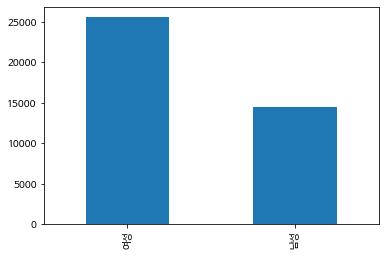

In [8]:
print(df_1903['성별'].value_counts())
df_1903['성별'].value_counts().plot.bar()

6 개
['40대', '20세 미만', '60대 이상', '20대', '50대', '30대']
40대       13614
30대       13186
20대        6654
50대        5042
60대 이상     1572
20세 미만       43
Name: 연령, dtype: int64


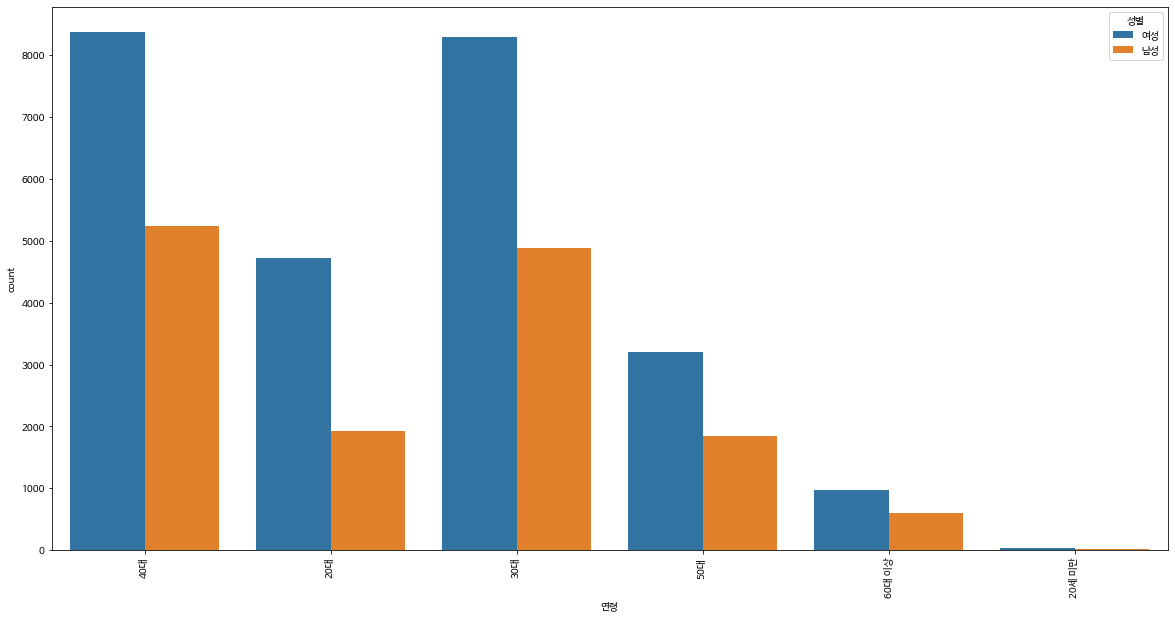

여성 연령 분포 및 순위
40대       8368
30대       8301
20대       4729
50대       3202
60대 이상     968
20세 미만      31
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
40대       5246
30대       4885
20대       1925
50대       1840
60대 이상     604
20세 미만      12
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


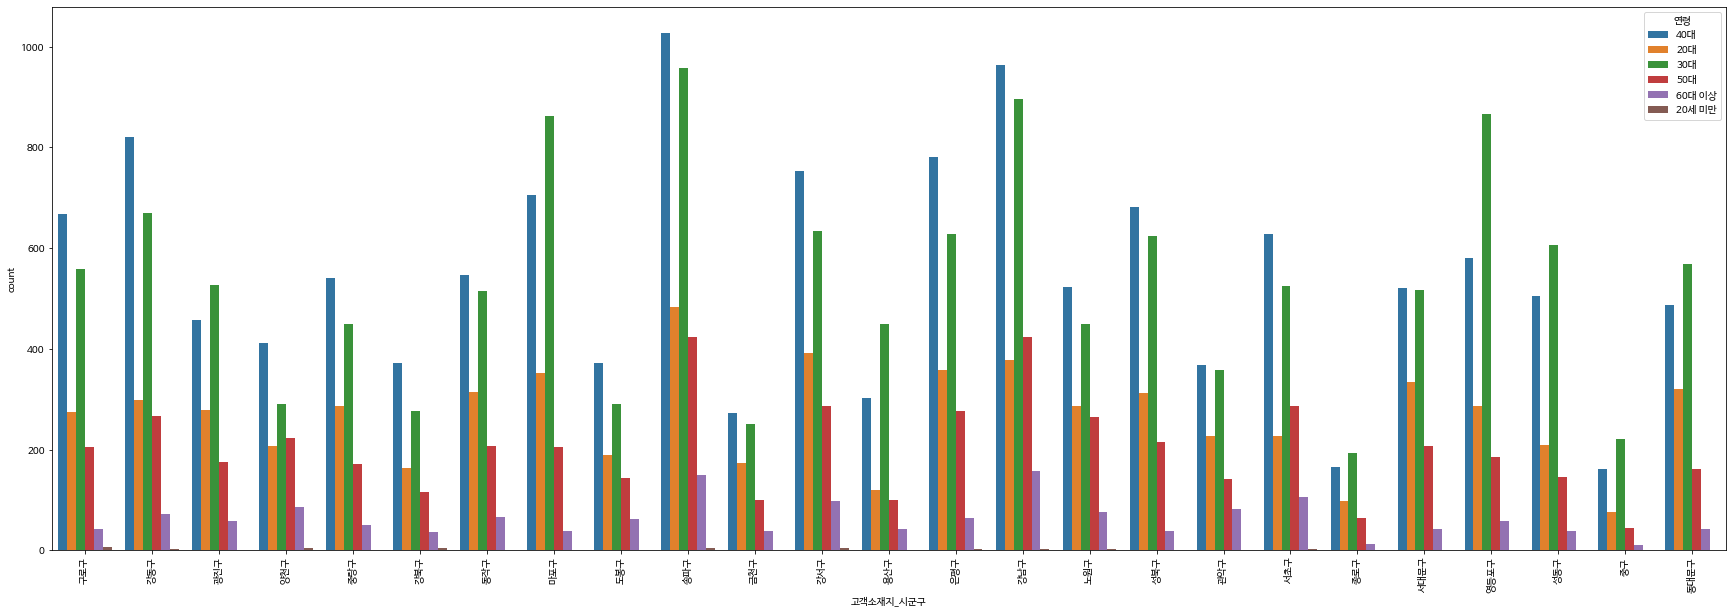

In [26]:
age = list(set(df_1903['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1903['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

df_1903_female =df_1903[df_1903['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1903_female['연령'].value_counts())
print(df_1903_female['연령'].value_counts().rank(ascending = False))

df_1903_male =df_1903[df_1903['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1903_male['연령'].value_counts())
print(df_1903_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

25 개
['구로구', '동대문구', '종로구', '강동구', '중랑구', '동작구', '강남구', '마포구', '강북구', '용산구', '광진구', '서초구', '성북구', '도봉구', '노원구', '양천구', '강서구', '서대문구', '중구', '관악구', '영등포구', '송파구', '성동구', '금천구', '은평구']


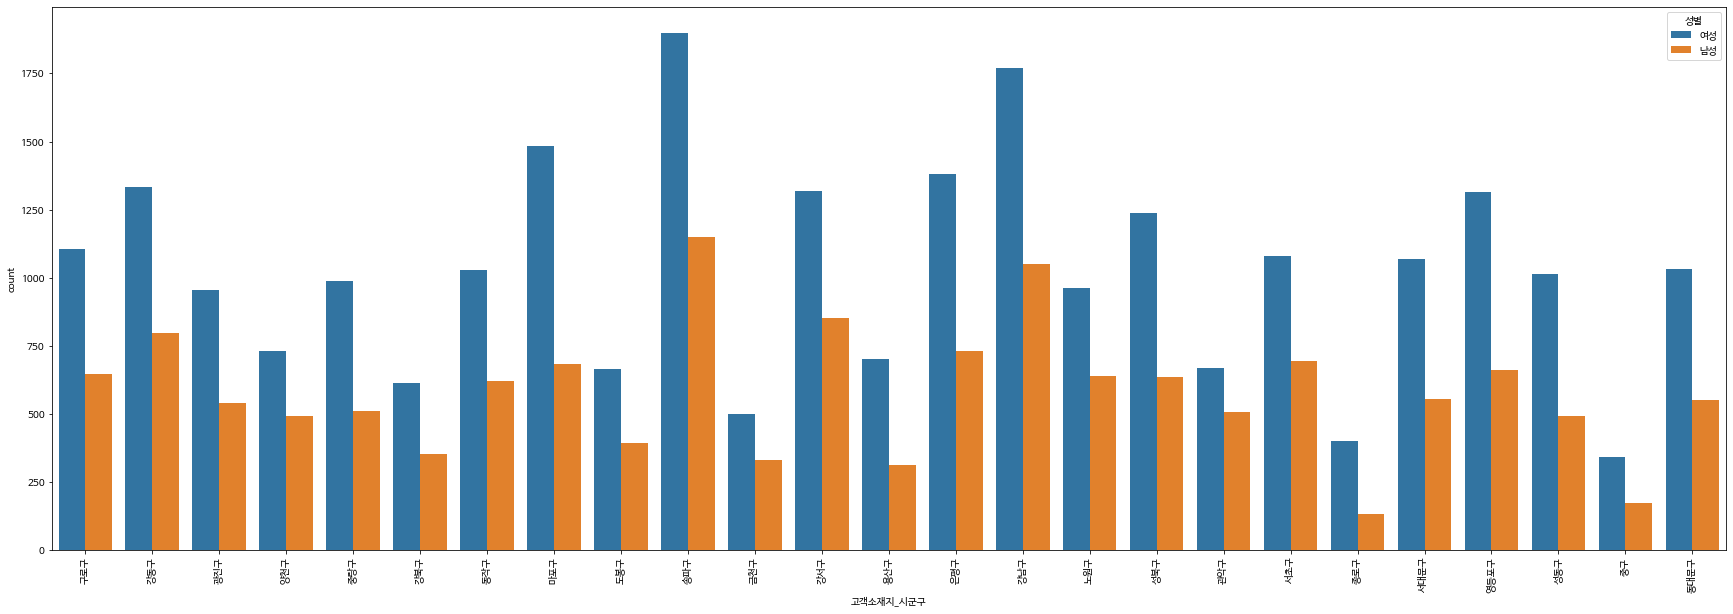

송파구    1.0
강남구    2.0
마포구    3.0
은평구    4.0
강동구    5.0
Name: 고객소재지_시군구, dtype: float64
송파구    1.0
강남구    2.0
강서구    3.0
강동구    4.0
은평구    5.0
Name: 고객소재지_시군구, dtype: float64


In [19]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

###################################### 필요한지에 대해서 의문
# print(df_1903['고객소재지_시군구'].value_counts()) 
# 이게 의미하는 바가 여성 의류 13건(==> 여성 의류별 1건) +  남성 의류 2건(==> 남성 의류별 1건) +  ,,,
# 이렇게 진행되는데 그냥 시군구별row를 개수 세서 저장하는건데 필요한지는 의문
# 아니면 내가 이걸 잘못 이해하고 있는 것일 수도 있음

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

print(df_1903_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1903_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['1인가구', '노인가구', '신혼영유아가구', '성인자녀가구', '초중고자녀가구']
신혼영유아가구    15900
초중고자녀가구     9029
1인가구        7896
성인자녀가구      5714
노인가구        1572
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

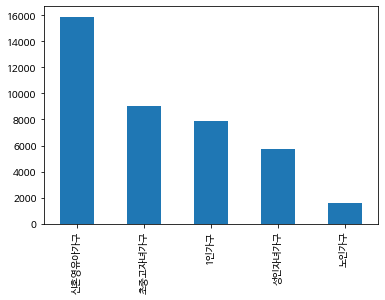

In [11]:
family = list(set(df_1903['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1903['가구생애주기'].value_counts())
df_1903['가구생애주기'].value_counts().plot.bar()

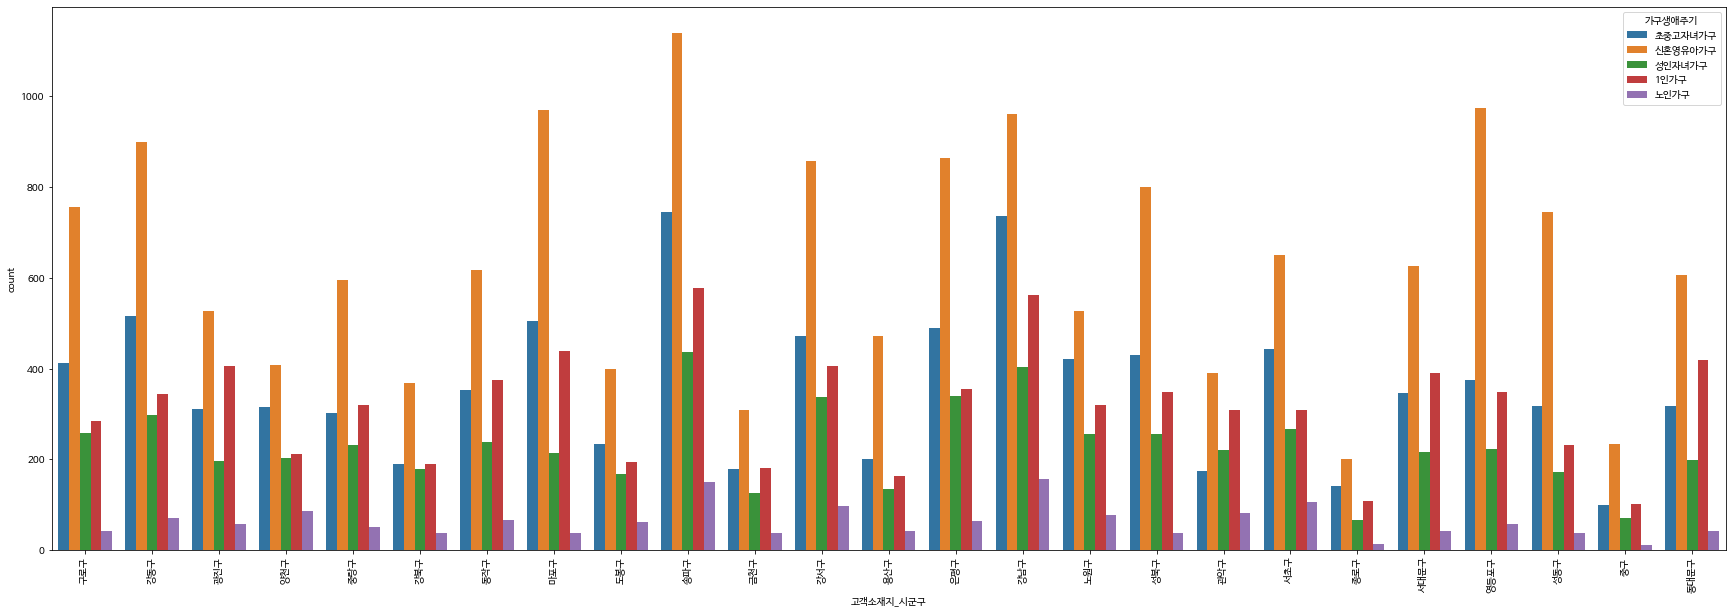

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 이렇게 한번에 보는 것도 방법이지만 따로 시군구 별로 plot해서 만드는거 계획 예정
# 추가로 명수라고 해야 되나 그 건수?도 추가 예정
# ex) 군포시 1인가구 : 123, 노인가구 : 123


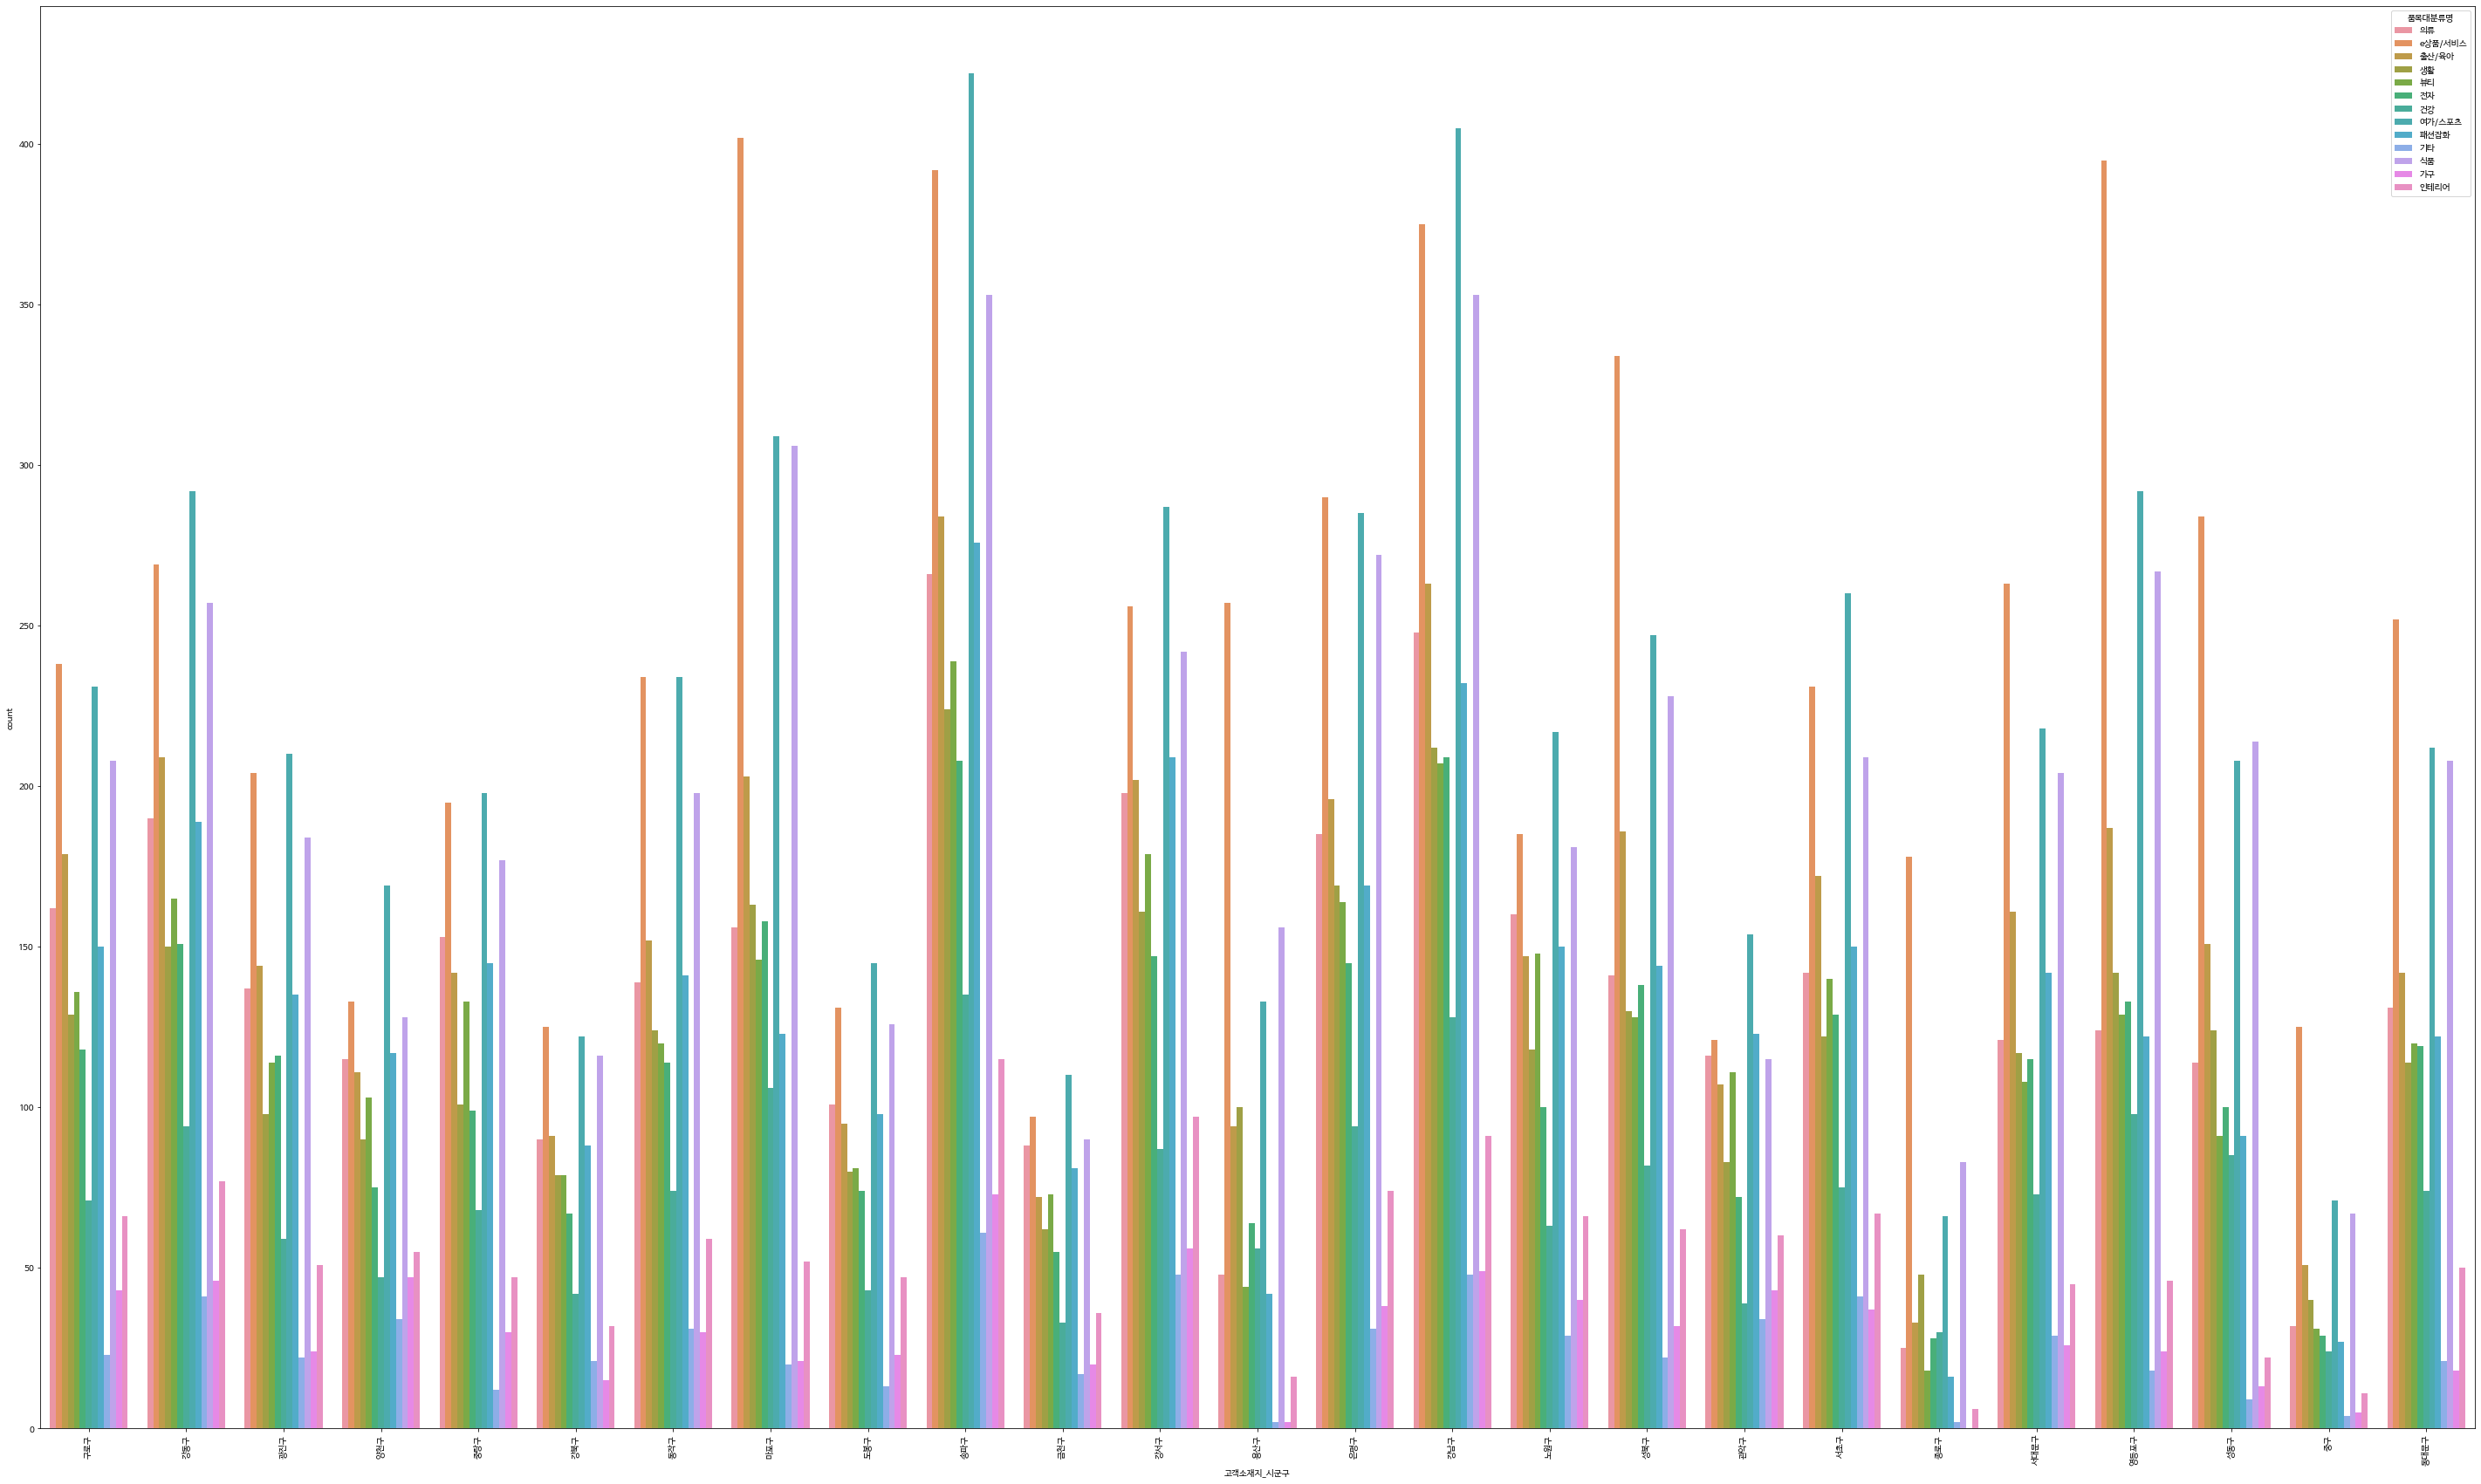

In [13]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

고객소재지_시군구
강남구     10052580397
강동구      6249600505
강북구      3096844179
강서구      7996575845
관악구      6742253526
광진구      4498731023
구로구      5197081004
금천구      2802226811
노원구      6400448244
도봉구      3489468811
동대문구     4161533507
동작구      5184447110
마포구      5100395281
서대문구     4223591259
서초구      7336746380
성동구      3361433787
성북구      4554528426
송파구     10129774284
양천구      6177588682
영등포구     4755784861
용산구      2071933626
은평구      5393628539
종로구       892571672
중구       1298778418
중랑구      4356451939
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

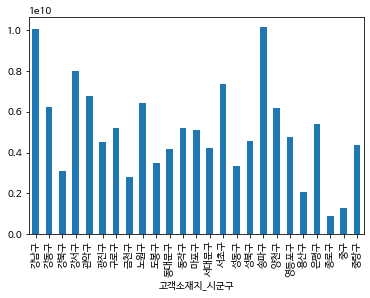

In [14]:
df_1903_매출금액합 = df_1903.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1903_매출금액합)
df_1903_매출금액합.plot.bar()

고객소재지_시군구
강남구     188301
강동구     142187
강북구      76046
강서구     188326
관악구     173504
광진구     101395
구로구     123258
금천구      70316
노원구     151568
도봉구      80456
동대문구     93843
동작구     118405
마포구     111075
서대문구     93802
서초구     134238
성동구      72954
성북구     104958
송파구     206974
양천구     134693
영등포구    104668
용산구      42709
은평구     128092
종로구      19862
중구       28566
중랑구     107936
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

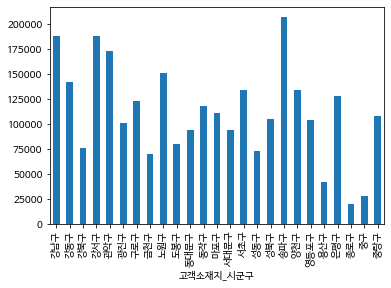

In [15]:
df_1903_매출건수합 = df_1903.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1903_매출건수합)
df_1903_매출건수합.plot.bar()

In [ ]:
# 이렇게 데이터의 구조 파악을 진행 완료 하려고 하는데 뭐더 파악이 필요한 
# 부분이 있을거 같으면 추가를 해야 겠다.
# 이렇게 1903, 1909, 2003, 2009, 2103 진행 예정
# 시각화 하는 것도 업로드된 거랑 똑같이 다 진행 예정